# Github Repository URL

[Link to our repo](https://github.com/Triakshan/MLG382--Project1-Group-C-.git)

# 1. Problem Statement

BC Finance plans to improve its loan application process by using a real-time automated system. They asked us to help complete their plan. This system intends to evaluate client information given via online application forms in a timely and accurate manner. Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, and Credit History are some of the important data factors reviewed during the eligibility examination. The organization has realized they need to identify certain consumer categories that are more likely to qualify for loans, allowing for more targeted and effective marketing campaigns. BC Finance has given us a partial dataset for this project, which can be found in the "data-for-project-1" folder, to help design a system that can anticipate loan eligibility in real time and properly categorize consumers.

# 2. Hypothesis Generation

Based on the variables impacting the loan application process at BC Finance, we developed various hypotheses to better understand the influence of socioeconomic characteristics on loan approval outcomes. First, we assume that candidates with no credit history are less likely to be accepted than those with a favourable credit record, emphasizing the relevance of credit history in risk assessment. Second, we believe that the ratio of an applicant's income to their requested loan amount has a major impact on acceptance decisions, with bigger loan requests resulting in more disapprovals due to heightened risk perceptions. Furthermore, we argue that including a co-applicant with a consistent income may increase the chance of loan acceptance by mitigating the risks associated with insufficient main income or low credit. However, dependents might lower the probability of approval due to fact that they consume a portion of the monthly income. This increases directly proportionally to the number of dependents.  Finally, we believe that work stability is important, with candidates in stable employment positions more likely to receive loan approval due to a perceived lower chance of default. These hypotheses seek to systematically investigate how these selected socioeconomic characteristics influence the chance of loan refusal or acceptance.

# 3. Prepare Data

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('../../data/raw_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Understanding each feature

- **Loan_ID**: Identification (Primary Key) of each applicant
- **Gender**: Applicant's gender
- **Married**: Applicant's marital status (Is the applicant married or not?)
- **Dependents**: The amount of people that are dependant of the applicant (eg. Children)
- **Education**: Applicant's education level
- **Self_Employed**: Applicant's type of employment (Do they work for themselves)
- **ApplicantIncome**: Applicant's income
- **CoapplicantIncome**: The co-applicant's income
- **LoanAmount**: The amount that the applicant wants to loan
- **Loan_Amount_Term**: The term for which the loan will be payed back
- **Credit_History**: Applicant's credit history
- **Property_Area**: The type of area in which the applicant wants to buy a home
- **Loan_Status**: This indicated whether the applicant is approved for the home loan or not

In [3]:
# Remove irrelevant columns
df.drop(columns='Loan_ID', inplace=True)

# 4. Exploratory Data Analysis (EDA)

## i) Univariate Analysis

### Displaying the data

In [4]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
471,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural,N
179,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
387,Male,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban,N
21,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
351,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N


### Check dimensions of the dataframe

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Visualizing categorical and numerical columns separately

#### Import necessary libraries

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Categorical Visualization

In [7]:
fig = px.box(
    data_frame= df, 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (Applicant_Income) - With Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

In [8]:
fig = px.box(
    data_frame= df, 
    x='CoapplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (Coapplicant_Income) - With Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

<Axes: xlabel='Credit_History', ylabel='count'>

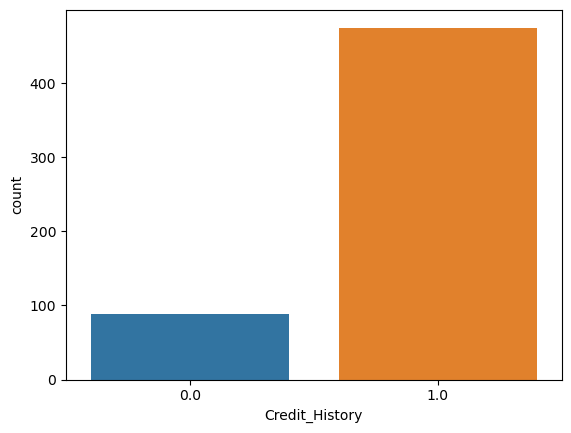

In [9]:
sns.countplot(x='Credit_History', data=df)

#### Comparing Yes and No Loan Statuses for Categorical Imbalances

In [10]:
labels = (
    df['Loan_Status']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

fig.update_layout(xaxis_title='Loan Status', yaxis_title='Number of Loan Applicants')
fig.show()

#### What is the percentage of Gender between male and female

<Axes: ylabel='count'>

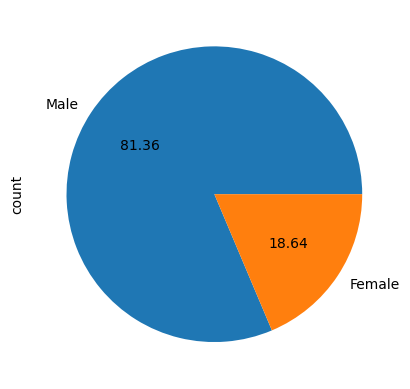

In [11]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

#### What is the percentage of people who are gradutes  and not graduates

<Axes: ylabel='count'>

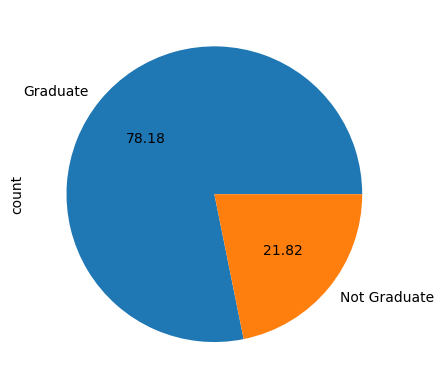

In [12]:
df['Education'].value_counts().plot(kind='pie',autopct='%.2f')

## ii) Bivariate Analysis

### 1. applicant income and loan status numerical and categorical

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

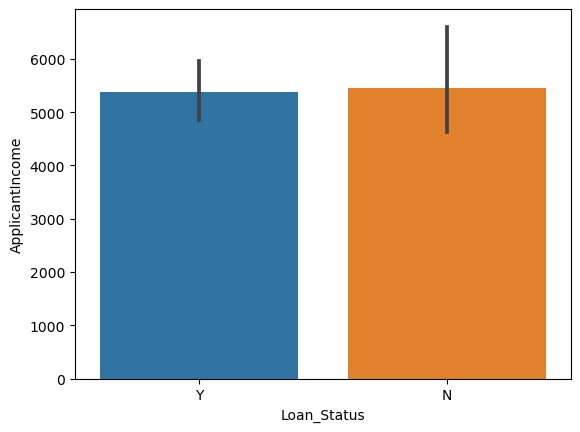

In [13]:
sns.barplot(x = 'Loan_Status' , y='ApplicantIncome' , data=df )

### 2 .Education and loan status 

<Axes: xlabel='Loan_Status', ylabel='Education'>

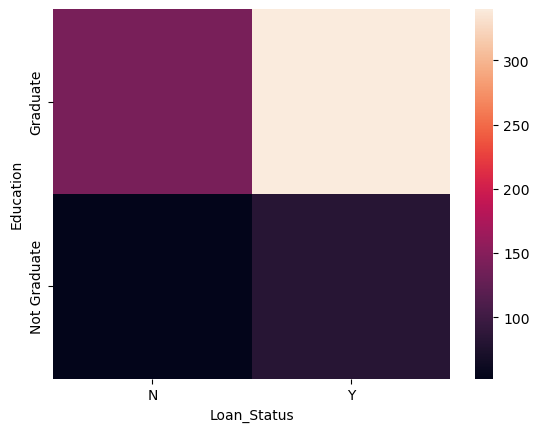

In [14]:
sns.heatmap(pd.crosstab(df['Education'] , df['Loan_Status']))

### 3. loan_amount and loan_amount_term

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

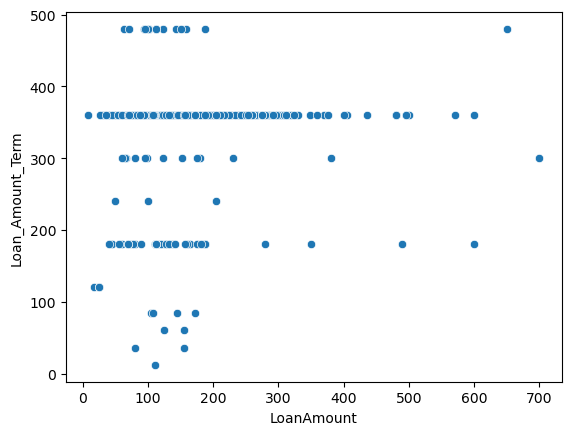

In [15]:
sns.scatterplot( x = 'LoanAmount' , y = 'Loan_Amount_Term' , data=df )

### 4. Self-employmed and loan status

<Axes: xlabel='Loan_Status', ylabel='Self_Employed'>

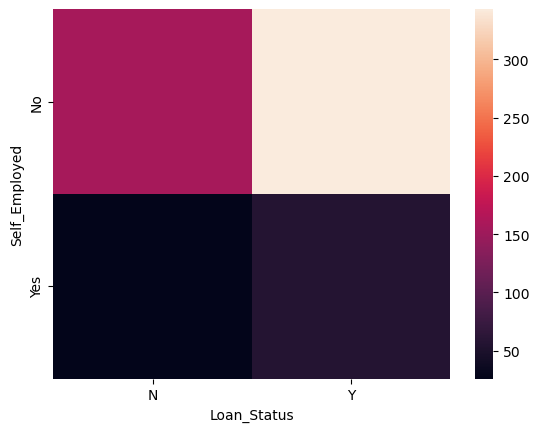

In [16]:
sns.heatmap(pd.crosstab(df['Self_Employed'] , df['Loan_Status']))

### 5. Applicant income and loan amount

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

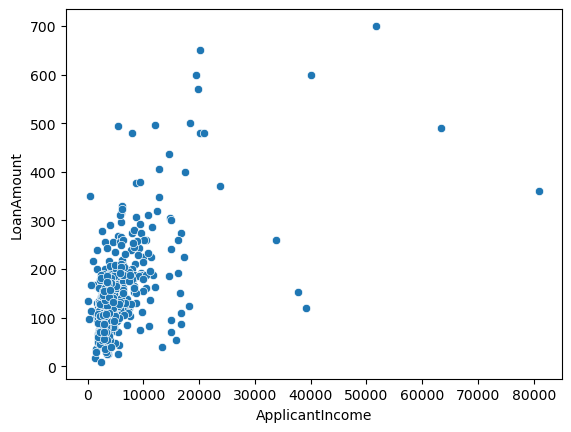

In [17]:
sns.scatterplot( x = 'ApplicantIncome' , y = 'LoanAmount' , data=df )

### 6. Dependents and loan amount

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

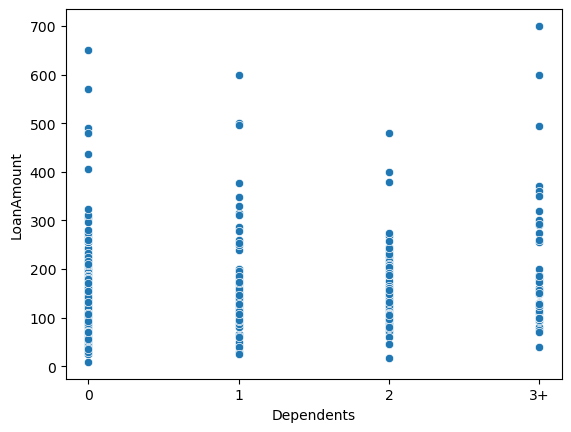

In [18]:
sns.scatterplot( x = 'Dependents' , y = 'LoanAmount' , data = df)

### 7. Gender and loan status

<Axes: xlabel='Loan_Status', ylabel='Gender'>

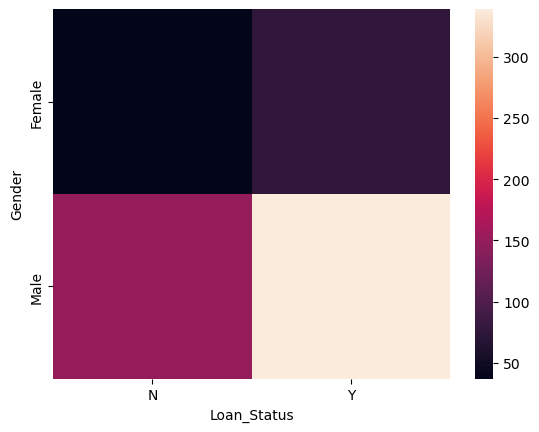

In [19]:
sns.heatmap(pd.crosstab(df['Gender'] , df['Loan_Status']))

### 8. Married and loan status

<Axes: xlabel='Loan_Status', ylabel='Married'>

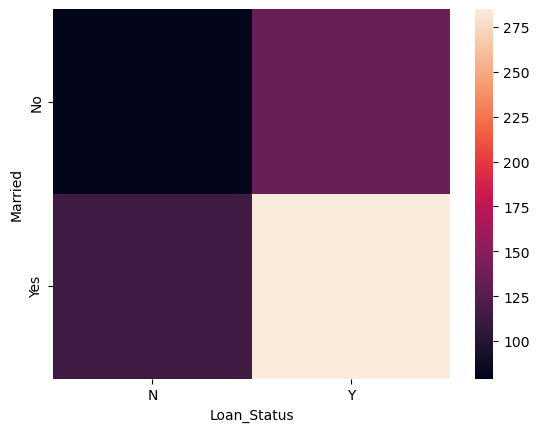

In [20]:
sns.heatmap(pd.crosstab(df['Married'] , df['Loan_Status']))

### 9. Credit history and loan status

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

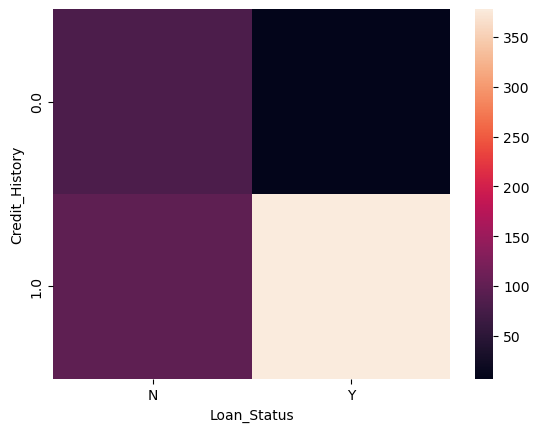

In [21]:
sns.heatmap(pd.crosstab(df['Credit_History'] , df['Loan_Status']))

# 5. Preprocess Data

## Analyze the data

In [22]:
import skimpy as sk
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Handling incomplete applications

In [23]:
# Remove rows with missing values
df.dropna(subset=['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term'], inplace=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    object 
 4   Self_Employed      523 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.2+ KB
None


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Handling duplicate values

In [24]:
print(df.duplicated().value_counts())
df.drop_duplicates()

False    553
Name: count, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Handling high and low cardinality features

In [25]:
# checking the cardinality of features
df.select_dtypes("object").nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

## Handling empty cells

In [26]:
(df.isnull().sum()/len(df)*100).round(4)

Gender               0.0000
Married              0.0000
Dependents           0.0000
Education            0.0000
Self_Employed        5.4250
ApplicantIncome      0.0000
CoapplicantIncome    0.0000
LoanAmount           0.0000
Loan_Amount_Term     0.0000
Credit_History       8.6799
Property_Area        0.0000
Loan_Status          0.0000
dtype: float64

### Fill categorical value(s)

In [27]:
# Fill categorical value(s)
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

(df.isnull().sum()/len(df)*100).round(4)

Gender               0.0000
Married              0.0000
Dependents           0.0000
Education            0.0000
Self_Employed        0.0000
ApplicantIncome      0.0000
CoapplicantIncome    0.0000
LoanAmount           0.0000
Loan_Amount_Term     0.0000
Credit_History       8.6799
Property_Area        0.0000
Loan_Status          0.0000
dtype: float64

### Fill numerical value(s)

In [28]:
# Fill numerical value(s)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

(df.isnull().sum()/len(df)*100).round(4)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## Outlier Treatment

### Visualize the outliers of the numerical features

In [29]:
# Plot / Visualize the outliers of the numerical features
import matplotlib.pyplot as plt
import plotly.express as px

for col in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]:
    fig = px.box(
        data_frame=df, 
        x=col,
        orientation='h',
        title=f'Boxplot of the Target ({col}) - With Outliers'
    )
    fig.show()

### Handling outliers

In [30]:
# Create a mask to filter out the outliers for 'ApplicantIncome'
mask_ApplicantIncome = df['ApplicantIncome'] <= 7441

print(df[mask_ApplicantIncome].head())
print(df[mask_ApplicantIncome].info())

fig = px.box(
    data_frame=df[mask_ApplicantIncome], 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (ApplicantIncome) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

In [31]:
# Create a mask to filter out the outliers for 'CoapplicantIncome'
mask_CoapplicantIncome = df['CoapplicantIncome'] <= 5302

print(df[mask_CoapplicantIncome].head())
print(df[mask_CoapplicantIncome].info())

fig = px.box(
    data_frame=df[mask_CoapplicantIncome], 
    x='CoapplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (CoapplicantIncome) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

In [32]:
# Create a mask to filter out the outliers for 'LoanAmount'
mask_LoanAmount1 = df['LoanAmount'] >= 25
mask_LoanAmount2 = df['LoanAmount'] <= 230

print(df[mask_LoanAmount1].head())
print(df[mask_LoanAmount2].info())

fig = px.box(
    data_frame=df[mask_LoanAmount1 & mask_LoanAmount2], 
    x='LoanAmount', 
    orientation='h',
    title='Boxplot of the Target (LoanAmount) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

In [33]:
# Create a mask to filter out the outliers for 'LoanAmount'
mask_Loan_Amount_Term = df['Loan_Amount_Term'] == 360

print(df[mask_Loan_Amount_Term].head())
print(df[mask_Loan_Amount_Term].info())

fig = px.box(
    data_frame=df[mask_Loan_Amount_Term], 
    x='Loan_Amount_Term', 
    orientation='h',
    title='Boxplot of the Target (Loan_Amount_Term) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4 

### Filtering out the outliers

In [34]:
df = df[mask_ApplicantIncome & mask_CoapplicantIncome & mask_LoanAmount1 & mask_LoanAmount2 & mask_Loan_Amount_Term]

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             371 non-null    object 
 1   Married            371 non-null    object 
 2   Dependents         371 non-null    object 
 3   Education          371 non-null    object 
 4   Self_Employed      371 non-null    object 
 5   ApplicantIncome    371 non-null    int64  
 6   CoapplicantIncome  371 non-null    float64
 7   LoanAmount         371 non-null    float64
 8   Loan_Amount_Term   371 non-null    float64
 9   Credit_History     371 non-null    float64
 10  Property_Area      371 non-null    object 
 11  Loan_Status        371 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 37.7+ KB
None


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Scaling

In [35]:
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1, 'N' : 0}).astype('int')

# 7. Modeling

## Split Data

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Status'], inplace=False)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Model and Predict**

In [37]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    DecisionTreeClassifier()) # build model

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    RandomForestClassifier()) # build model

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    LogisticRegression()) # build model

# fit the model
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed',
                                     'Property_Area'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Accuracy of Model

In [38]:
from sklearn.metrics import accuracy_score

y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", (accuracy*100).__round__(4))

y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier:", (accuracy*100).__round__(4))

y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression:", (accuracy*100).__round__(4))

Decision Tree Accuracy: 74.6667
Random Forest Classifier: 84.0
Logistic Regression: 86.6667


## **Evaluate**

In [39]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
# Predict the train data
y_pred_training = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Random Forest Regressor
# Predict the train data
y_pred_training = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Logistic Regression
# Predict the train data
y_pred_training = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

Training MAE: 0.0
Test data MAE: 0.25
Training MAE: 0.0
Test data MAE: 0.16
Training MAE: 0.18
Test data MAE: 0.13


In [40]:
def make_prediction(row):

    data = {
        "Gender": row[1],
        "Married": row[2],
        "Dependents": row[3],
        "Education": row[4],
        "Self_Employed": row[5],
        "ApplicantIncome": row[6],
        "CoapplicantIncome": row[7],
        "LoanAmount": row[8],
        "Loan_Amount_Term": row[9],
        "Credit_History": row[10],
        "Property_Area": row[11]
    }

    df_predict = pd.DataFrame(data, index=[0])
    prediction_dt = model_dt.predict(df_predict)[0]
    prediction_rf = model_rf.predict(df_predict)[0]
    prediction_lr = model_lr.predict(df_predict)[0]
    return f"Decision Tree: {prediction_dt}; Random Forest: {prediction_rf} Logistic Regression: {prediction_lr}"

In [41]:
print(make_prediction(pd.Series(['dfgd', 'Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0, 1.0, 'Rural']))) # Should output 1
print(make_prediction(pd.Series(['dfgd', 'Male', 'No', '0', 'Graduate', 'No', 6000, 0.0, 141.0, 360.0, 1.0, 'Urban']))) # Should output 1
print(make_prediction(pd.Series(['dfgd', 'Female', 'No', '4', 'Not Graduate', 'Yes', 200, 0.0, 1000.0, 360.0, 0.0, 'Rural']))) # Should output 0


Decision Tree: 0; Random Forest: 0 Logistic Regression: 1
Decision Tree: 1; Random Forest: 1 Logistic Regression: 1
Decision Tree: 0; Random Forest: 0 Logistic Regression: 0


In [42]:
df_val = pd.read_csv("../../data/validation.csv")

for i in range(0, 2):#df_val.shape[0]):
    row = df_val.iloc[i]
    print(make_prediction(row))


Decision Tree: 1; Random Forest: 1 Logistic Regression: 1
Decision Tree: 1; Random Forest: 1 Logistic Regression: 1


C:\Users\hroux\AppData\Local\Temp\ipykernel_234920\2255154042.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hroux\AppData\Local\Temp\ipykernel_234920\2255154042.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hroux\AppData\Local\Temp\ipykernel_234920\2255154042.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hroux\AppData\Local\Temp\ipykernel_234920\2255154042.py:7: FutureWarning:

Series.__g

# 8. Feature Engineering

In [43]:
# Feature Engineering
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            371 non-null    object 
 1   Married           371 non-null    object 
 2   Dependents        371 non-null    object 
 3   Education         371 non-null    object 
 4   Self_Employed     371 non-null    object 
 5   LoanAmount        371 non-null    float64
 6   Loan_Amount_Term  371 non-null    float64
 7   Credit_History    371 non-null    float64
 8   Property_Area     371 non-null    object 
 9   Loan_Status       371 non-null    int32  
 10  Income            371 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 33.3+ KB
None


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0
6,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,1,3849.0


# 9. Modeling (With Feature Engineering)

## **Split Data**

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Status'], inplace=False)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Model and Predict**

In [45]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    DecisionTreeClassifier()) # build model

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    RandomForestClassifier()) # build model

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    LogisticRegression()) # build model

# fit the model
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed',
                                     'Property_Area'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Accuracy of Model (With Feature Engineering)

In [46]:
from sklearn.metrics import accuracy_score

y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", (accuracy*100).__round__(4))

y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier:", (accuracy*100).__round__(4))

y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression:", (accuracy*100).__round__(4))

Decision Tree Accuracy: 74.6667
Random Forest Classifier: 80.0
Logistic Regression: 86.6667


## **Evaluate**

In [47]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
# Predict the train data
y_pred_training = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Random Forest Regressor
# Predict the train data
y_pred_training = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Logistic Regression
# Predict the train data
y_pred_training = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

Training MAE: 0.0
Test data MAE: 0.25
Training MAE: 0.0
Test data MAE: 0.2
Training MAE: 0.18
Test data MAE: 0.13


In [48]:
def make_prediction_FE(row):

    data = {
        "Gender": row[0],
        "Married": row[1],
        "Dependents": row[2],
        "Education": row[3],
        "Self_Employed": row[4],
        "LoanAmount": row[5],
        "Loan_Amount_Term": row[6],
        "Credit_History": row[7],
        "Property_Area": row[8],
        "Income": row[9]
    }

    df_predict = pd.DataFrame(data, index=[0])
    prediction_dt = model_dt.predict(df_predict)[0]
    prediction_rf = model_rf.predict(df_predict)[0]
    prediction_lr = model_lr.predict(df_predict)[0]
    return f"Decision Tree: {prediction_dt}; Random Forest: {prediction_rf} Logistic Regression: {prediction_lr}"

In [49]:
print(make_prediction_FE(pd.Series(['Male', 'Yes', '1', 'Graduate', 'No', 128.0, 360.0, 1.0, 'Rural', (4583 + 1508)]))) # Should output 1
print(make_prediction_FE(pd.Series(['Male', 'No', '0', 'Graduate', 'No', 141.0, 360.0, 1.0, 'Urban', (6000 + 0)]))) # Should output 1
print(make_prediction_FE(pd.Series(['Female', 'No', '4', 'Not Graduate', 'Yes', 1000.0, 360.0, 0.0, 'Rural', (200 + 0)]))) # Should output 0

Decision Tree: 0; Random Forest: 0 Logistic Regression: 1
Decision Tree: 1; Random Forest: 1 Logistic Regression: 1
Decision Tree: 0; Random Forest: 0 Logistic Regression: 0


# Dash App

In [50]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("../../artifacts/model_1.pkl")

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Loan Prediction System"),
    html.Label("Gender"),
    dcc.Dropdown(
        id="gender-dropdown",
        options=[
            {'label': 'Male', 'value': 'Male'},
            {'label': 'Female', 'value': 'Female'}
        ],
        value='Male'
    ),
    html.Label("Married"),
    dcc.Dropdown(
        id="married-dropdown",
        options=[
            {'label': 'Yes', 'value': 'Yes'},
            {'label': 'No', 'value': 'No'}
        ],
        value='No'
    ),
    html.Label("Dependents"),
    dcc.Input(id="dependents-number", 
        type="number", 
        value=0
    ),
    html.Label("Education"),
    dcc.Dropdown(
        id="education-dropdown",
        options=[
            {'label': 'Graduate', 'value': 'Graduate'},
            {'label': 'Not Graduate', 'value': 'Not Graduate'}
        ],
        value='Not Graduate'
    ),
    html.Label("Self Employed"),
    dcc.Dropdown(
        id="self-employed-dropdown",
        options=[
            {'label': 'Yes', 'value': 'Yes'},
            {'label': 'No', 'value': 'No'}
        ],
        value='No'
    ),
    html.Label("Applicant's Income"),
    dcc.Input(id="applicantIncome", type="number", value=5000),
    html.Label("Co-Applicant's Income"),
    dcc.Input(id="coapplicantIncome", type="number", value=0),
    html.Label("Loan Amount"),
    dcc.Input(id="loan_amount", type="number", value=120),
    html.Label("Loan Term (months)"),
    dcc.Input(id="loan_term", type="number", value=360),
    html.Label("Credit History"),
    dcc.Dropdown(
        id="credit_history-dropdown",
        options=[
            {'label': 'Yes', 'value': 1},
            {'label': 'No', 'value': 0}
        ],
        value=0
    ),
    html.Label("Property Area"),
    dcc.Dropdown(
        id="property_area-dropdown",
        options=[
            {'label': 'Urban', 'value': 'Urban'},
            {'label': 'Semiurban', 'value': 'Semiurban'},
            {'label': 'Rural', 'value': 'Rural'}
        ],
        value='Urban'
    ),
    html.Button("Predict", id="predict_button", n_clicks=0),
    html.Div(id="prediction_output")
])

# Define callback to update prediction result
@app.callback(
    Output("prediction_output", "children"),
    [Input("predict_button", "n_clicks")],
    [Input("gender-dropdown", "value"),
     Input("married-dropdown", "value"),
     Input("dependents-number", "value"),
     Input("education-dropdown", "value"),
     Input("self-employed-dropdown", "value"),
     Input("applicantIncome", "value"),
     Input("coapplicantIncome", "value"),
     Input("loan_amount", "value"),
     Input("loan_term", "value"),
     Input("credit_history-dropdown", "value"),
     Input("property_area-dropdown", "value")]
)
def update_prediction(n_clicks, gender, married, dependents, education, self_employed, income, co_income, loan_amount, loan_term, credit_history, property_area):
    if n_clicks > 0:
        # Preprocess input data
        data = pd.DataFrame({
            "Gender": [gender],
            "Married": [married],
            "Dependents": [dependents],
            "Education": [education],
            "Self_Employed": [self_employed],
            "ApplicantIncome": [income],
            "CoapplicantIncome": [co_income],
            "LoanAmount": [loan_amount],
            "Loan_Amount_Term": [loan_term],
            "Credit_History": [credit_history],
            "Property_Area": [property_area]
        })
        # Make prediction
        prediction = model.predict(data)[0]
        return html.Div(f"Loan Status: {'Approved' if prediction == 1 else 'Rejected'}")
    else:
        return ""

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)